In [6]:
!tree models

models
└── model1
    ├── assets
    ├── keras_metadata.pb
    ├── saved_model.pb
    └── variables
        ├── variables.data-00000-of-00001
        └── variables.index

3 directories, 4 files


In [7]:
import tensorflow as tf
import PIL
import pathlib
import numpy as np

### Load and test model

In [8]:
model = tf.keras.models.load_model('models/model1')
class_names = ["masza", "rysia"]

2022-08-27 15:48:15.407145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:48:15.440996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:48:15.441370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:48:15.442317: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 300, 300, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                  

In [11]:
cats_nonseen = pathlib.Path("./dataset/mycats_nontraning/")
masza_nonseen = list(cats_nonseen.glob('masza*'))
rysia_nonseen = list(cats_nonseen.glob('rysia*'))
print("Masza: ", masza_nonseen)
print("Rysia: ", rysia_nonseen)

Masza:  [PosixPath('dataset/mycats_nontraning/masza2.jpg'), PosixPath('dataset/mycats_nontraning/masza1.jpg')]
Rysia:  [PosixPath('dataset/mycats_nontraning/rysia2.jpg'), PosixPath('dataset/mycats_nontraning/rysia1.jpg')]


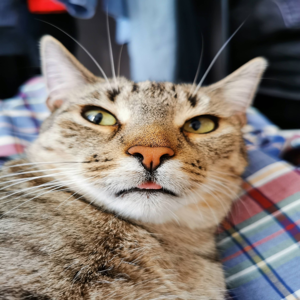

In [12]:
newsize = (300, 300)
PIL.Image.open(str(rysia_nonseen[0])).resize(newsize)

### Predict

In [13]:
img_height = 300
img_width = 300

In [14]:
img = tf.keras.utils.load_img(
    str(rysia_nonseen[1]), target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

2022-08-27 15:49:20.341095: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-08-27 15:49:21.025461: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 2s 2s/step


2022-08-27 15:49:21.434109: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [15]:
print(list(model.signatures.keys()))

['serving_default']


In [16]:
print(
    "this picture presents `{}` with a `{:.2f}` percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

this picture presents `rysia` with a `100.00` percent confidence.
